# Taiwanese Credit Default Dataset

### Build a model to compute probability of default for Taiwanese Credit Card Clients
***
** Loading the dataset **
- Note that the dataset is not a csv file but an Excel Sheet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_excel("./default of credit card clients_with_named_headers.xls")
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1      20000    2          2         1   24      2      2     -1     -1   
2     120000    2          2         2   26     -1      2      0      0   
3      90000    2          2         2   34      0      0      0      0   
4      50000    2          2         1   37      0      0      0      0   
5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
1     -2             ...                      0          0          0   
2      0             ...                   3272       3455       3261   
3      0             ...                  14331      14948      15549   
4      0             ...                  28314      28959      29547   
5      0             ...                  20940      19146      19131   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
1         0       689         0         0         0         0   
2         0      1000      1000      1000         0      2000   
3      1518      1500      1000      1000      1000      5000   
4      2000      2019      1200      1100      1069      1000   
5      2000     36681     10000      9000       689       679   

   default payment next month  
1                           1  
2                           1  
3                           0  
4                           0  
5                           0  

[5 rows x 24 columns]

## Initial Exploration
***
In this stage we'll get an high level overview of what our dataset contains


***
### Number of rows (samples) and columns (features) in the dataset 

In [2]:
df.shape

(30000, 24)

***
### Analyzing the data types of each feature

In [3]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

All the features including the target are numerical

***
### Getting a summary of the numerical features

In [4]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               30000.000000   30000.000000   
mean              ...               43262.948967   40311.400967   
std               ...               64332.856134   60797.155770   
min               ...             -170000.000000  -81334.000000   
25%               ...                2326.750000    1763.000000   
50%               ...               19052.000000   18104.500000   
75%               ...               54506.000000   50190.500000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   30000.000000   30000.000000  3.000000e+04   30000.00000   
mean    38871.760400    5663.580500  5.921163e+03    5225.68150   
std     59554.107537   16563.280354  2.304087e+04   17606.96147   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1256.000000    1000.000000  8.330000e+02     390.00000   
50%     17071.000000    2100.000000  2.009000e+03    1800.00000   
75%     49198.250000    5006.000000  5.000000e+03    4505.00000   
max    961664.000000  873552.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count   30000.000000   30000.000000   30000.000000                30000.000000  
mean     4826.076867    4799.387633    5215.502567                    0.221200  
std     15666.159744   15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000       0.000000                    0.000000  
25%       296.000000     252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4013.250000    4031.500000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 24 columns]

***

### Distplots for all the features

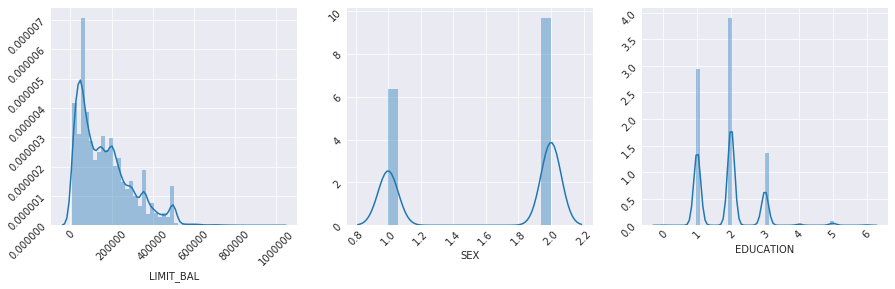

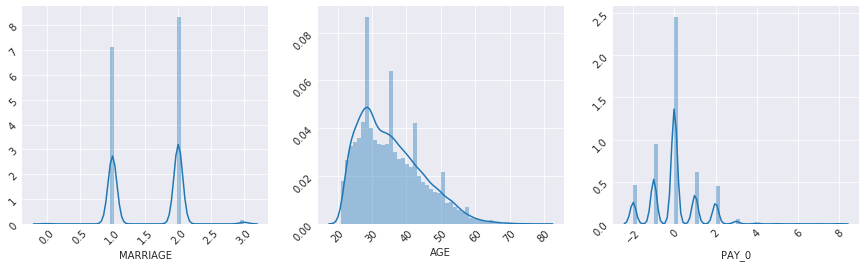

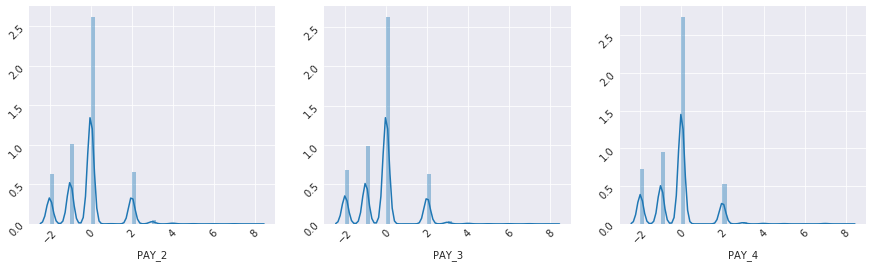

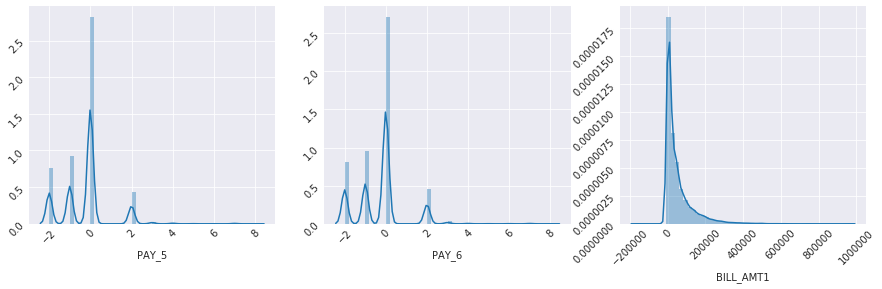

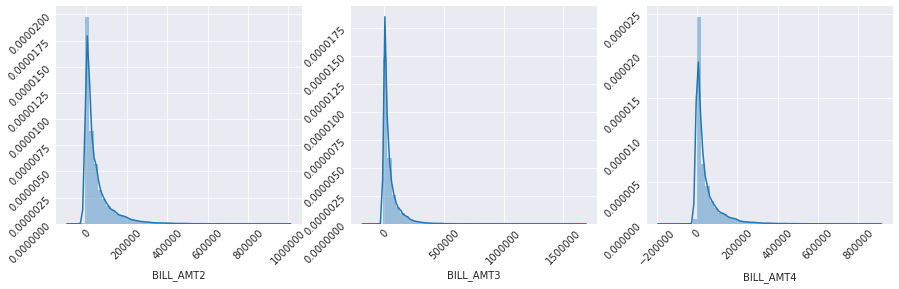

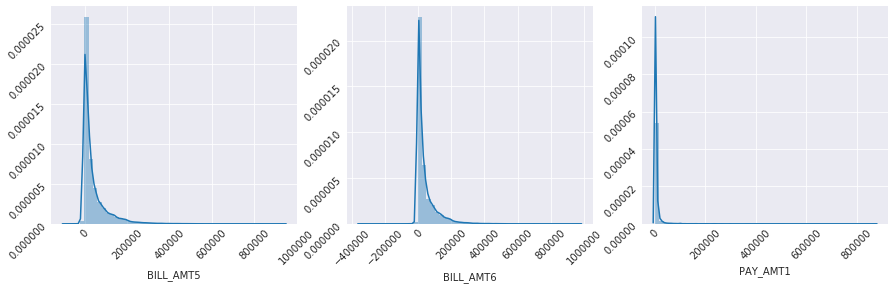

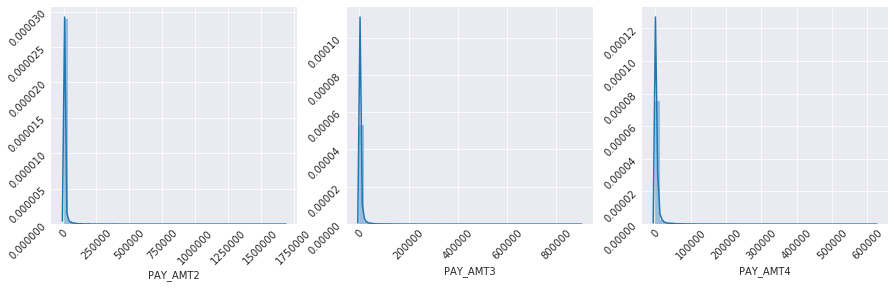

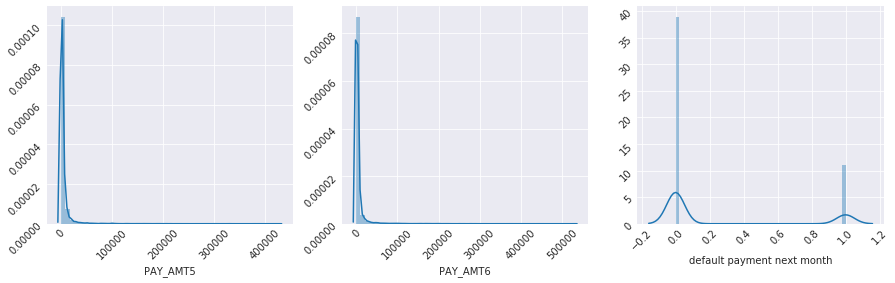

In [5]:
features = df.columns

# Plots distplots for all the features
for idx, feature in enumerate(features):
    if idx%3 == 0:
        plt.figure(figsize=(15,4))
        plt.subplot("131")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.distplot(df[feature])
    elif idx%3 == 1:
        plt.subplot("132")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.distplot(df[feature])
    else:
        plt.subplot("133")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.distplot(df[feature])


***
### Checking if there are any null values in the dataset

In [6]:
df.isnull().sum(axis=0)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Great, there seems to be no null values in this dataset.

***
### Let's observe the correlation between all the features

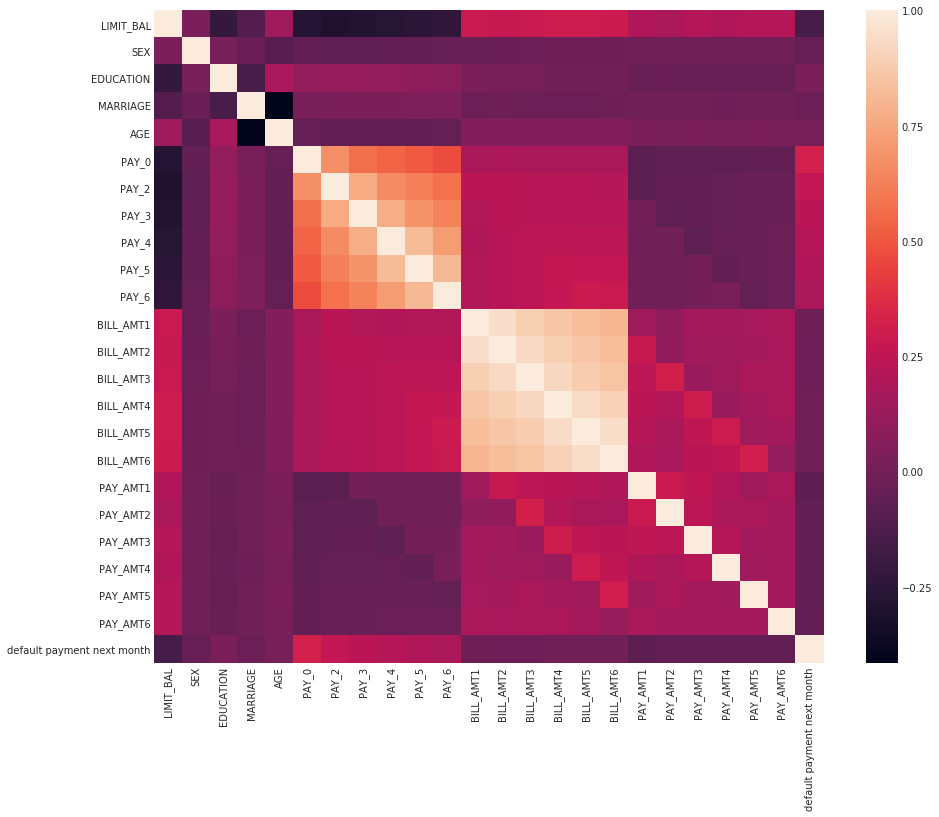

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=False)

All the BILL_AMT features seem to be highly correlated.
Let's combine all of these features by replacing all of them by their mean

***
### Combine all the BILL_AMT into a single feature

In [8]:
cleaned_df = df.copy()
cleaned_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1      20000    2          2         1   24      2      2     -1     -1   
2     120000    2          2         2   26     -1      2      0      0   
3      90000    2          2         2   34      0      0      0      0   
4      50000    2          2         1   37      0      0      0      0   
5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
1     -2             ...                      0          0          0   
2      0             ...                   3272       3455       3261   
3      0             ...                  14331      14948      15549   
4      0             ...                  28314      28959      29547   
5      0             ...                  20940      19146      19131   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
1         0       689         0         0         0         0   
2         0      1000      1000      1000         0      2000   
3      1518      1500      1000      1000      1000      5000   
4      2000      2019      1200      1100      1069      1000   
5      2000     36681     10000      9000       689       679   

   default payment next month  
1                           1  
2                           1  
3                           0  
4                           0  
5                           0  

[5 rows x 24 columns]

In [9]:
# Get all tje BILL_AMT column names
cols = df.columns[11:17]

# Calculate mean across these columns
mean = cleaned_df[cols].mean(axis=1)

# Drop the all the original BILL_AMT features and replace it with a new NEW_BILL_AMT feature
cleaned_df.insert(0, "NEW_BILL_AMT", mean)
cleaned_df.drop(list(cols), axis=1, inplace=True)
cleaned_df.head()

NEW_BILL_AMT  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
1   1284.000000      20000    2          2         1   24      2      2   
2   2846.166667     120000    2          2         2   26     -1      2   
3  16942.166667      90000    2          2         2   34      0      0   
4  38555.666667      50000    2          2         1   37      0      0   
5  18223.166667      50000    1          2         1   57     -1      0   

   PAY_3  PAY_4  PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
1     -1     -1     -2     -2         0       689         0         0   
2      0      0      0      2         0      1000      1000      1000   
3      0      0      0      0      1518      1500      1000      1000   
4      0      0      0      0      2000      2019      1200      1100   
5     -1      0      0      0      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0                           1  
2         0      2000                           1  
3      1000      5000                           0  
4      1069      1000                           0  
5       689       679                           0

***
### Handling Outliers
Let's look at the box plots to get a feel for the outliers

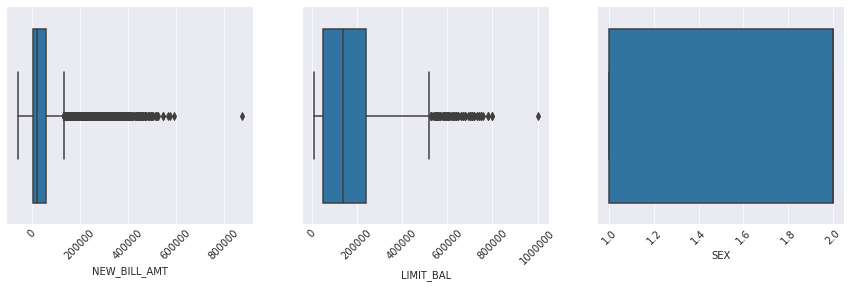

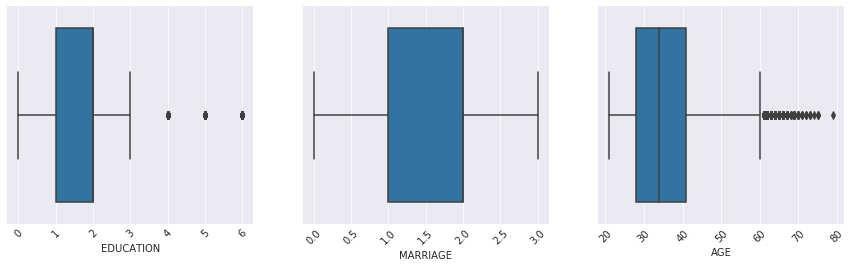

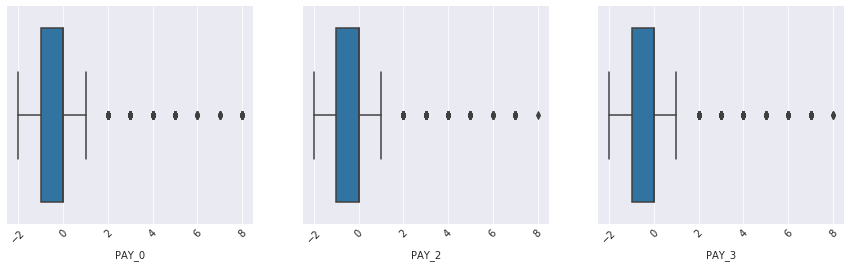

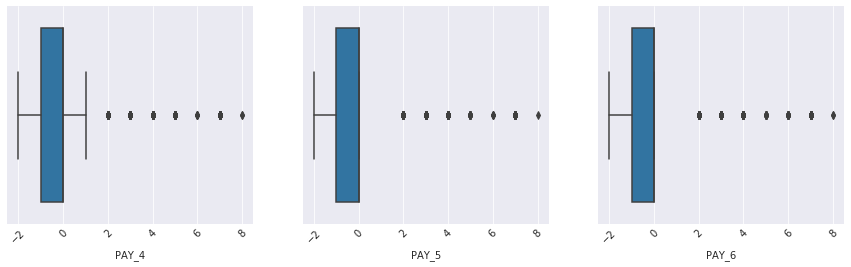

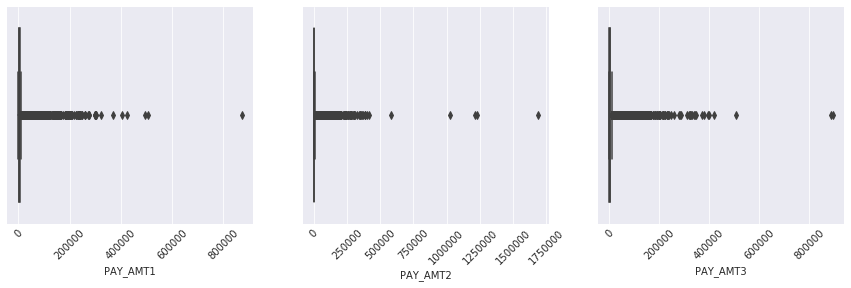

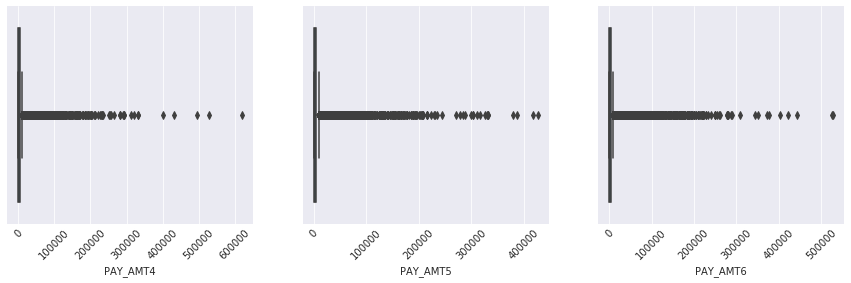

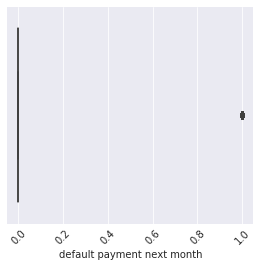

In [10]:
features = cleaned_df.columns

# Plots distplots for all the features
for idx, feature in enumerate(features):
    if idx%3 == 0:
        plt.figure(figsize=(15,4))
        plt.subplot("131")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.boxplot(cleaned_df[feature])
    elif idx%3 == 1:
        plt.subplot("132")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.boxplot(cleaned_df[feature])
    else:
        plt.subplot("133")
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        sns.boxplot(cleaned_df[feature])

Lets remove the rows containing outliers

In [11]:
# Dropping all the rows with suspected outliers
cleaned_df.drop(cleaned_df[cleaned_df["NEW_BILL_AMT"] > 600000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["LIMIT_BAL"] > 800000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["PAY_AMT1"] > 500000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["PAY_AMT2"] > 750000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["PAY_AMT3"] > 500000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["PAY_AMT4"] > 400000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["PAY_AMT5"] > 350000].index, inplace=True)
cleaned_df.drop(cleaned_df[cleaned_df["PAY_AMT6"] > 400000].index, inplace=True)

***
### Handling Skewness
- From the distplots above, it can be seen that some of the features are pretty skewed.
- Let's handle skewness by applying square root transform.

In [12]:
cleaned_features = cleaned_df.columns

for feature in cleaned_features[:-1]:
    # Apply sqrt transform only on those features containing all non-negative values
    if (cleaned_df[feature] >= 0).all():
        cleaned_df[feature] = np.sqrt(cleaned_df[feature])
cleaned_df.head()

NEW_BILL_AMT   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  PAY_0  \
1   1284.000000  141.421356  1.414214   1.414214  1.000000  4.898979      2   
2   2846.166667  346.410162  1.414214   1.414214  1.414214  5.099020     -1   
3  16942.166667  300.000000  1.414214   1.414214  1.414214  5.830952      0   
4  38555.666667  223.606798  1.414214   1.414214  1.000000  6.082763      0   
5  18223.166667  223.606798  1.000000   1.414214  1.000000  7.549834     -1   

   PAY_2  PAY_3  PAY_4  PAY_5  PAY_6   PAY_AMT1    PAY_AMT2    PAY_AMT3  \
1      2     -1     -1     -2     -2   0.000000   26.248809    0.000000   
2      2      0      0      0      2   0.000000   31.622777   31.622777   
3      0      0      0      0      0  38.961519   38.729833   31.622777   
4      0      0      0      0      0  44.721360   44.933284   34.641016   
5      0     -1      0      0      0  44.721360  191.522845  100.000000   

    PAY_AMT4   PAY_AMT5   PAY_AMT6  default payment next month  
1   0.000000   0.000000   0.000000                           1  
2  31.622777   0.000000  44.721360                           1  
3  31.622777  31.622777  70.710678                           0  
4  33.166248  32.695565  31.622777                           0  
5  94.868330  26.248809  26.057628                           0

***
### Scaling
We scale the features as scaled data gives better results with certain models

In [13]:
from sklearn import preprocessing

# Scale all the features except the target
cleaned_df.iloc[:, :-1] = preprocessing.scale(cleaned_df.iloc[:, :-1])
cleaned_df.head()

NEW_BILL_AMT  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
1     -0.693563  -1.484026  0.810247   0.291546 -1.038529 -1.337643  1.794269   
2     -0.668680  -0.192411  0.810247   0.291546  0.860744 -1.072695 -0.874966   
3     -0.444156  -0.484837  0.810247   0.291546  0.860744 -0.103269  0.014779   
4     -0.099891  -0.966184  0.810247   0.291546 -1.038529  0.230248  0.014779   
5     -0.423752  -0.966184 -1.234191   0.291546 -1.038529  2.173347 -0.874966   

      PAY_2     PAY_3     PAY_4     PAY_5     PAY_6  PAY_AMT1  PAY_AMT2  \
1  1.781789 -0.696706 -0.666606 -1.529906 -1.485698 -1.085830 -0.534411   
2  1.781789  0.138712  0.188572  0.234727  1.991756 -1.085830 -0.432209   
3  0.111532  0.138712  0.188572  0.234727  0.253029 -0.316435 -0.297046   
4  0.111532  0.138712  0.188572  0.234727  0.253029 -0.202692 -0.179069   
5  0.111532 -0.696706  0.188572  0.234727  0.253029 -0.202692  2.608778   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1 -0.979049 -0.943211 -0.938375 -0.881482                           1  
2 -0.361428 -0.311727 -0.938375 -0.049099                           1  
3 -0.361428 -0.311727 -0.308263  0.434631                           0  
4 -0.302479 -0.280905 -0.286886 -0.292899                           0  
5  0.974042  0.951243 -0.415344 -0.396481                           0

***
### Time for Predictions!
- We first create a generalized function that takes data and the classifier as the input
- The function then splits the dataset into training and testing data and then measures performance of the classifier with this data
- We will then use this function to analyze performance of various different models.

In [15]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
def measure_performance(df, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25, random_state=33)
    clf = clf.fit(X_train,y_train)
    
    y_pred=clf.predict(X_test)
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")

    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y_test,y_pred),"\n")
        
    if show_confusion_matrix:
        print ("Confusion matrix")
        print (metrics.confusion_matrix(y_test,y_pred),"\n")

***
### Using Decision Tree Classifier

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5,min_samples_leaf=5)
measure_performance(cleaned_df, clf)

Accuracy:0.826 

Classification report
             precision    recall  f1-score   support

          0       0.85      0.95      0.90      5885
          1       0.68      0.36      0.47      1611

avg / total       0.81      0.83      0.81      7496
 

Confusion matrix
[[5606  279]
 [1025  586]] 



***
### Using Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(tree.DecisionTreeClassifier(random_state=9),
                               n_estimators=500,
                               max_samples=100,
                               bootstrap=True,
                               random_state=9)
measure_performance(cleaned_df, bagging_clf)

Accuracy:0.825 

Classification report
             precision    recall  f1-score   support

          0       0.85      0.95      0.89      5885
          1       0.66      0.37      0.48      1611

avg / total       0.81      0.82      0.81      7496
 

Confusion matrix
[[5581  304]
 [1009  602]] 



***
### Using Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
measure_performance(cleaned_df, rf_clf)

Accuracy:0.811 

Classification report
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      5885
          1       0.61      0.33      0.43      1611

avg / total       0.79      0.81      0.79      7496
 

Confusion matrix
[[5548  337]
 [1076  535]] 



***
### Using AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100)
measure_performance(cleaned_df, ada_clf)

Accuracy:0.823 

Classification report
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      5885
          1       0.67      0.35      0.46      1611

avg / total       0.81      0.82      0.80      7496
 

Confusion matrix
[[5612  273]
 [1054  557]] 

